In [1]:
import numpy as np
import cv2
from skimage.transform import resize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
def construct_similarity_graph(data, sigma=1.0):
    n_samples = data.shape[0]
    similarity_graph = np.zeros((n_samples, n_samples))

    for i in range(n_samples):
        for j in range(i + 1, n_samples):
            similarity = np.exp(-np.linalg.norm(data[i] - data[j]) ** 2 / (2 * sigma ** 2))
            similarity_graph[i, j] = similarity
            similarity_graph[j, i] = similarity

    return similarity_graph

In [21]:
def spectral_clustering(data, num_clusters, sigma=1.0):
    # Step 1: Construct the similarity graph
    W = construct_similarity_graph(data, sigma)

    # Step 2: Compute the graph Laplacian
    D = np.diag(np.sum(W, axis=1))
    L = D - W

    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(L)

    # Step 4: Select eigenvector corresponding to the k smallest eigenvalue
    second_smallest_eigenvector = eigenvectors[:, 1]

    # Step 5: Apply K-Means clustering on the selected eigenvector
    kmeans = KMeans(n_clusters=num_clusters)
    labels = kmeans.fit_predict(second_smallest_eigenvector.reshape(-1, 1))

    return labels

In [22]:
def visualize_clustered_image(labels, original_shape, image):
    # Reshape the labels to match the original image shape
    clustered_image = labels.reshape(original_shape[:2])

    # Calculate mean color for each cluster
    num_clusters = len(np.unique(labels))
    cluster_means = np.zeros((num_clusters, original_shape[2]))
    for i in range(num_clusters):
        cluster_pixels = image[clustered_image == i]
        cluster_means[i] = np.mean(cluster_pixels, axis=0)

    # Assign mean colors to each pixel based on cluster labels
    colored_image = np.zeros(original_shape)
    for cluster_idx, mean_color in enumerate(cluster_means):
        colored_image[clustered_image == cluster_idx] = mean_color

    return colored_image

In [26]:
def load_and_resize_images(image_paths):
    resized_images = []
    for path in image_paths:
        image = plt.imread(path)
        resized_image = resize(image, (64, 64), anti_aliasing=True)
        resized_images.append(resized_image)
    return resized_images

In [29]:
def compute_silhouette_score(features, cluster_labels):
    silhouette_avg = silhouette_score(features, cluster_labels)
    return silhouette_avg

In [30]:
image_paths = ["/content/drive/MyDrive/cvasg2/image1.jpg", "/content/drive/MyDrive/cvasg2/image2.jpg"]
resized_images = load_and_resize_images(image_paths)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


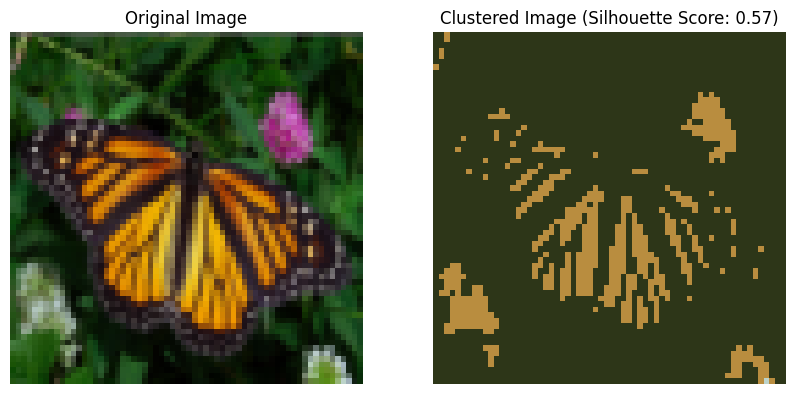

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


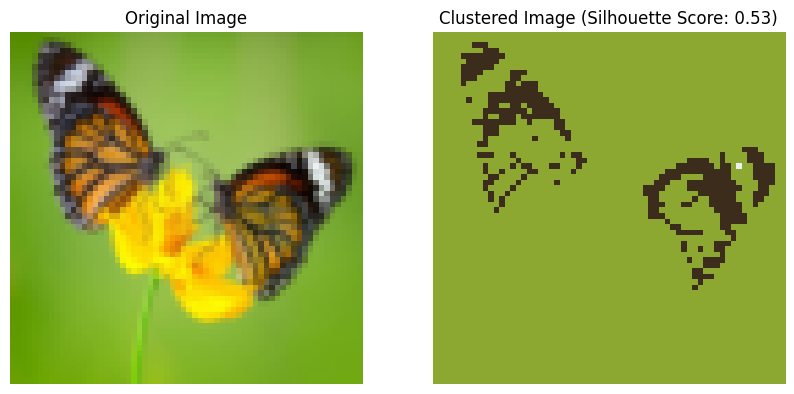

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


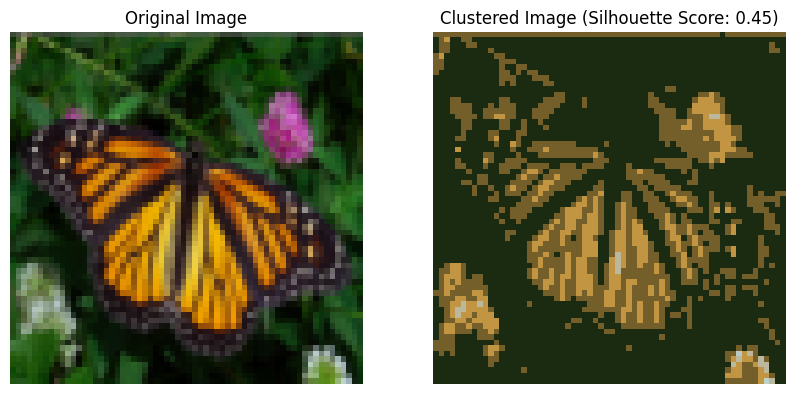

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


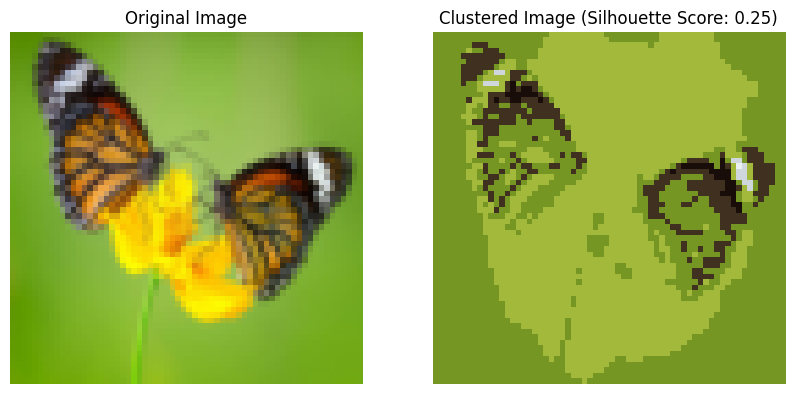

In [31]:
# Number of clusters
num_clusters_list = [3, 6]

for num_clusters in num_clusters_list:
  for i, image_resized in enumerate(resized_images):
    labels = spectral_clustering(image_resized.reshape(-1, 3), num_clusters)

    # Visualize the clustered image
    clustered_image = visualize_clustered_image(labels, image_resized.shape, image_resized)

    # Compute silhouette score
    features = image_resized.reshape((-1, 3)).astype(np.float32)
    silhouette_avg = compute_silhouette_score(features, labels)

    # Display the original and clustered images
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(image_resized)
    plt.title('Original Image')
    plt.axis('off')

    # Clustered Image
    plt.subplot(1, 2, 2)
    plt.imshow(clustered_image)
    plt.title(f'Clustered Image (Silhouette Score: {silhouette_avg:.2f})')
    plt.axis('off')

    plt.show()